# Определение перспективного тарифа для телеком компании


## План проекта



1. Изучение данных
2. Предобработка данных
3. Расчет новых показателей
4. Формирование рабочей таблицы
5. Анализ данных
6. Проверка гипотез
7. Выводы

Цель проекта: в целях корректировки рекламного бюджета компании-оператора сотовой связи определить наиболее выгодный тариф на основании имеющейся информации.


Задачи проекта:
- анализ поведения клиентов;
- определение наиболее выгодного тарифа.

## 1. Изучение данных

In [1]:
import pandas as pd
users = pd.read_csv('/datasets/users.csv') 
users.info()
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [2]:
calls = pd.read_csv('/datasets/calls.csv') 
calls.info()
calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [3]:
messages = pd.read_csv('/datasets/messages.csv') 
messages.info()
messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [4]:
internet = pd.read_csv('/datasets/internet.csv') 
internet.info()
internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [5]:
tariffs = pd.read_csv('/datasets/tariffs.csv') 
tariffs.info()
tariffs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Вывод

Выведена информация о данных. Выведены первые 5 значений переменных. В данных нет пропусков, об этом свидетельствует количество значений в переменных. Несколько переменных нуждаются в изменении типа: user_id с integer на object; churn_date, reg_date, call_date, session_date, message_date с object на date.

## 2. Предобработка данных

In [6]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

In [7]:
users['user_id'] = users['user_id'].astype('object')
calls['user_id'] = calls['user_id'].astype('object')
internet['user_id'] = internet['user_id'].astype('object')
messages['user_id'] = messages['user_id'].astype('object')
users.info()
print('')
calls.info()
print('')
internet.info()
print('')
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null object
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 31.4+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null object
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 6.2+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         1

Bзменяем типы переменных: user_id с integer на object; churn_date, reg_date, call_date, session_date, message_date с object на date. Проверяем.

In [8]:
print(users.duplicated().sum())# проверка на дубли

0


In [9]:
print(users.isnull().sum())# проверка на нулевые значения

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64


In [10]:
users.describe()

,age
count,500.00000
mean,46.58800
std,16.66763
min,18.00000
25%,32.00000
50%,46.00000
75%,62.00000
max,75.00000


In [11]:
print(users['tariff'].value_counts())

smart    351
ultra    149
Name: tariff, dtype: int64


In [12]:
print(users['city'].value_counts())

Москва             99
Санкт-Петербург    39
Новосибирск        16
Казань             14
Омск               14
                   ..
Подольск            1
Архангельск         1
Иваново             1
Химки               1
Нижневартовск       1
Name: city, Length: 76, dtype: int64


Изучим таблицу users на предмет ошибок. Проверяем на дубли, дублей нет. Проверяем на нулевые значения, нулевые значения наблюдаются в переменной churn_date, это значит, что тариф действующий.
Проверяем конкретные переменные.
Переменная age (возраст): минимальное значение - 18, максимальное - 75. Похоже на правду.
Переменная tariff: два вида значений, тоже все нормально.
Переменная city: никаких аномальных значений не обнаружено.

In [13]:
print(calls.duplicated().sum())# проверка на дубли

0


In [14]:
print(calls.isnull().sum())# проверка на нулевые значения

id           0
call_date    0
duration     0
user_id      0
dtype: int64


In [15]:
calls.describe()

,duration
count,202607.000000
mean,6.755887
std,5.843365
min,0.000000
25%,1.300000
50%,6.000000
75%,10.700000
max,38.000000


Изучим таблицу calls на предмет ошибок. Проверяем на дубли, дублей нет. Проверяем на нулевые значения, нулевые значения отсутствуют. В переменной duration есть значения, равные нулю.

In [16]:
print((calls['duration']==0).value_counts())
calls = calls[calls.duration != 0] # исключение строк со временем звонков 0
print((calls['duration'] == 0).value_counts())  # проверка на наличие 0 в переменной duration

False    162994
True      39613
Name: duration, dtype: int64
False    162994
Name: duration, dtype: int64


Посчитаем количество звонков с длительностью разговора, равной нулю. Их 39613 шт или 19,5%. Достаточно большое количество. Но исходя их задач исследования, нужно определить перспективный тариф, а тариф включает в себя минуты, а не звонки. С точки зрения дохода для оператора, звонки с нулевым временем (т.е. пропущенные или сброшенные звонящим или тем, кому звонят) - это звонки, которые не состоялись, т.к. сотовый оператор не получил по ним доход.
Таким образом, эти звонки, с точки зрения исследования, лишние.
Считаю, их нужно удалить. Удаляем звонки с длительностью разговора 0 минут. Проверяем.

In [17]:
print(messages.duplicated().sum())# проверка на дубли

0


In [18]:
print(messages.isnull().sum())# проверка на нулевые значения

id              0
message_date    0
user_id         0
dtype: int64


Изучим таблицу messages на предмет ошибок. Проверяем на дубли, дублей нет. Проверяем на нулевые значения, нулевые значения отсутствуют.

In [19]:
print(internet.duplicated().sum())# проверка на дубли

0


In [20]:
print(internet.isnull().sum())# проверка на нулевые значения

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64


In [22]:
internet.describe()

,Unnamed: 0,mb_used
count,149396.000000,149396.000000
mean,74697.500000,370.192426
std,43127.054745,278.300951
min,0.000000,0.000000
25%,37348.750000,138.187500
50%,74697.500000,348.015000
75%,112046.250000,559.552500
max,149395.000000,1724.830000


Изучим таблицу internet на предмет ошибок. Проверяем на дубли, дублей нет. Проверяем на нулевые значения, нулевые значения отсутствуют. В таблице присутствует лишний столбец Unnamed: 0, видимо, это порядковая нумерация строк. Кроме того, в переменной mb_used присутствуют значения, равные нулю.

In [23]:
del internet['Unnamed: 0']
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null object
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 4.6+ MB


Удаляем столбец Unnamed: 0. Проверяем удаление.

In [24]:
print((internet['mb_used']==0).value_counts())
internet = internet[internet.mb_used != 0] # исключение строк с количеством Мб = 0
print((internet['mb_used'] == 0).value_counts())  # проверка на наличие 0 в переменной mb_used

False    129798
True      19598
Name: mb_used, dtype: int64
False    129798
Name: mb_used, dtype: int64


Посчитаем количество сессий с объемом потраченных Мб, равным нулю. Их 19598 шт или 15,1%. Достаточно большое количество. Но исходя их задач исследования, нужно определить перспективный тариф, а с точки зрения дохода для оператора, сессии с нулевым количеством Мб - это сессии, которых не было, т.к. сотовый оператор не получил по ним доход.
Таким образом, эти сессии, с точки зрения исследования, лишние.
Считаю, их нужно удалить. Удаляем сессии с объемом потраченных Мб, равным нулю. Проверяем.

## 3. Расчет новых показателей

In [25]:
print((calls.call_date.dt.year).value_counts())# определяем к каким годам относятся данные в таблице calls
calls['month'] = calls.call_date.dt.month
calls.head()

2018    162994
Name: call_date, dtype: int64


,id,call_date,duration,user_id,month
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12
7,1000_7,2018-08-22,18.31,1000,8
8,1000_8,2018-09-15,18.44,1000,9


Проверяем к каким годам относятся данные в таблице calls. Они относятся только к 2018 г.
Вводим новую переменную month в таблице calls, проставляем в нее номера месяцев из переменной call_date. Проверяем.

In [26]:
calls_month = calls.groupby(['user_id', 'month']).agg({'duration': 'count'})
calls_month.set_axis(['call_quant'],axis = 'columns',inplace = True)
calls_month.head()

call_quant
user_id month            
1000    5              17
        6              28
        7              41
        8              42
        9              46

Рассчитаем количество звонков по каждому пользователю помесячно. Переименовываем столбец в таблице calls_month. Проверяем.

In [27]:
calls_month_min = calls.groupby(['user_id', 'month']).agg({'duration': 'sum'})
calls_month_min.head()

duration
user_id month          
1000    5        150.06
        6        158.90
        7        318.80
        8        389.87
        9        440.14

Рассчитаем количество израсходованных минут по каждому пользователю помесячно. Проверяем.

In [28]:
messages['month'] = messages.message_date.dt.month
messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [29]:
messages_month = messages.groupby(['user_id', 'month']).agg({'id': 'count'})
messages_month.set_axis(['mess_quant'],axis = 'columns',inplace = True)
messages_month.head()

mess_quant
user_id month            
1000    5              22
        6              60
        7              75
        8              81
        9              57

Вводим новую переменную month в таблице messages, проставляем в нее номера месяцев из переменной message_date. Проверяем.
Рассчитаем количество сообщений по каждому пользователю помесячно. Проверяем.  
Переименовываем столбец в таблице messages_month. Проверяем.

In [30]:
internet['month'] = internet.session_date.dt.month
internet.head()

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9


In [31]:
internet_month = internet.groupby(['user_id', 'month']).agg({'mb_used': 'sum'})
internet_month.head()

mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91

Вводим новую переменную month в таблице internet, проставляем в нее номера месяцев из переменной session_date. Проверяем.
Рассчитаем количество потраченных Мб по каждому пользователю помесячно. Проверяем.

## 4. Формирование рабочей таблицы

In [32]:
data_users = calls_month.merge(calls_month_min, on=['user_id', 'month'])
data_users

call_quant  duration
user_id month                      
1000    5              17    150.06
        6              28    158.90
        7              41    318.80
        8              42    389.87
        9              46    440.14
...                   ...       ...
1498    10             30    232.63
1499    9               8     64.65
        10             44    429.91
        11             62    576.50
        12             56    465.16

[3168 rows x 2 columns]

In [33]:
data_users = data_users.merge(messages_month, on=['user_id', 'month'], how='outer')
data_users

call_quant  duration  mess_quant
user_id month                                  
1000    5            17.0    150.06        22.0
        6            28.0    158.90        60.0
        7            41.0    318.80        75.0
        8            42.0    389.87        81.0
        9            46.0    440.14        57.0
...                   ...       ...         ...
1489    8             NaN       NaN        17.0
        9             NaN       NaN        32.0
        10            NaN       NaN        21.0
        11            NaN       NaN        20.0
        12            NaN       NaN        35.0

[3212 rows x 3 columns]

In [34]:
data_users = data_users.merge(internet_month, on=['user_id', 'month'], how='outer')
data_users

call_quant  duration  mess_quant   mb_used
user_id month                                            
1000    5            17.0    150.06        22.0   2253.49
        6            28.0    158.90        60.0  23233.77
        7            41.0    318.80        75.0  14003.64
        8            42.0    389.87        81.0  14055.93
        9            46.0    440.14        57.0  14568.91
...                   ...       ...         ...       ...
1489    10            NaN       NaN        21.0  19559.44
        11            NaN       NaN        20.0  17491.56
        12            NaN       NaN        35.0  17322.51
1240    2             NaN       NaN         NaN    959.51
1476    4             NaN       NaN         NaN    530.78

[3214 rows x 4 columns]

Объединяем полученные таблицы в общую таблицу data_users.

In [35]:
data_users = data_users.join(users[['user_id', 'tariff', 'city']].set_index('user_id'), on='user_id')
data_users.set_axis(['call_quant', 'duration', 'mess_quant', 'mb_used', 'tariff_name', 'city'],axis = 'columns',inplace = True)
data_users

call_quant  duration  mess_quant   mb_used tariff_name  \
user_id month                                                           
1000    5            17.0    150.06        22.0   2253.49       ultra   
        6            28.0    158.90        60.0  23233.77       ultra   
        7            41.0    318.80        75.0  14003.64       ultra   
        8            42.0    389.87        81.0  14055.93       ultra   
        9            46.0    440.14        57.0  14568.91       ultra   
...                   ...       ...         ...       ...         ...   
1489    10            NaN       NaN        21.0  19559.44       smart   
        11            NaN       NaN        20.0  17491.56       smart   
        12            NaN       NaN        35.0  17322.51       smart   
1240    2             NaN       NaN         NaN    959.51       ultra   
1476    4             NaN       NaN         NaN    530.78       ultra   

                          city  
user_id month                   
1000    5            Краснодар  
        6            Краснодар  
        7            Краснодар  
        8            Краснодар  
        9            Краснодар  
...                        ...  
1489    10     Санкт-Петербург  
        11     Санкт-Петербург  
        12     Санкт-Петербург  
1240    2              Воронеж  
1476    4               Москва  

[3214 rows x 6 columns]

Объединяем таблицу data_users с полями таблицы users (tariff, city). Переименовываем столбец tariff на tariff_name. Проверяем

In [36]:
data_users.reset_index(level=1, inplace=True)
data_users.reset_index(level=0, inplace=True)
data_users

,user_id,month,call_quant,duration,mess_quant,mb_used,tariff_name,city
0,1000,5,17.0,150.06,22.0,2253.49,ultra,Краснодар
1,1000,6,28.0,158.90,60.0,23233.77,ultra,Краснодар
2,1000,7,41.0,318.80,75.0,14003.64,ultra,Краснодар
3,1000,8,42.0,389.87,81.0,14055.93,ultra,Краснодар
4,1000,9,46.0,440.14,57.0,14568.91,ultra,Краснодар
...,...,...,...,...,...,...,...,...
3209,1489,10,NaN,NaN,21.0,19559.44,smart,Санкт-Петербург
3210,1489,11,NaN,NaN,20.0,17491.56,smart,Санкт-Петербург
3211,1489,12,NaN,NaN,35.0,17322.51,smart,Санкт-Петербург
3212,1240,2,NaN,NaN,NaN,959.51,ultra,Воронеж


Убираем индексацию из столбцов user_id и month. Проверяем.

In [37]:
data_users = data_users.merge(tariffs, on=['tariff_name'])
data_users

,user_id,month,call_quant,duration,mess_quant,mb_used,tariff_name,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,17.0,150.06,22.0,2253.49,ultra,Краснодар,1000,30720,3000,1950,150,1,1
1,1000,6,28.0,158.90,60.0,23233.77,ultra,Краснодар,1000,30720,3000,1950,150,1,1
2,1000,7,41.0,318.80,75.0,14003.64,ultra,Краснодар,1000,30720,3000,1950,150,1,1
3,1000,8,42.0,389.87,81.0,14055.93,ultra,Краснодар,1000,30720,3000,1950,150,1,1
4,1000,9,46.0,440.14,57.0,14568.91,ultra,Краснодар,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,NaN,NaN,17.0,11050.56,smart,Санкт-Петербург,50,15360,500,550,200,3,3
3210,1489,9,NaN,NaN,32.0,17206.30,smart,Санкт-Петербург,50,15360,500,550,200,3,3
3211,1489,10,NaN,NaN,21.0,19559.44,smart,Санкт-Петербург,50,15360,500,550,200,3,3
3212,1489,11,NaN,NaN,20.0,17491.56,smart,Санкт-Петербург,50,15360,500,550,200,3,3


Объединяем таблицу data_users с таблицей tariffs по столбцу tariff_name. Проверяем.

In [38]:
data_users['minutes_included'] = data_users['minutes_included'].astype(float)
data_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 15 columns):
user_id                  3214 non-null int64
month                    3214 non-null int64
call_quant               3168 non-null float64
duration                 3168 non-null float64
mess_quant               2717 non-null float64
mb_used                  3201 non-null float64
tariff_name              3214 non-null object
city                     3214 non-null object
messages_included        3214 non-null int64
mb_per_month_included    3214 non-null int64
minutes_included         3214 non-null float64
rub_monthly_fee          3214 non-null int64
rub_per_gb               3214 non-null int64
rub_per_message          3214 non-null int64
rub_per_minute           3214 non-null int64
dtypes: float64(5), int64(8), object(2)
memory usage: 401.8+ KB


In [39]:
data_users = data_users.fillna(0)# заполнение пустых значений нулями
data_users['minutes_above_tar'] = data_users['duration']- data_users['minutes_included']
data_users.loc[data_users['minutes_above_tar'] <0, 'minutes_above_tar'] = 0
data_users.loc[data_users['minutes_above_tar']-round(data_users['minutes_above_tar']) > 0, 'minutes_above_tar'] = round(data_users['minutes_above_tar'])+1
data_users.loc[data_users['minutes_above_tar']-round(data_users['minutes_above_tar']) < 0, 'minutes_above_tar'] = round(data_users['minutes_above_tar'])
data_users.sample(20)

,user_id,month,call_quant,duration,mess_quant,mb_used,tariff_name,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_above_tar
909,1471,2,8.0,71.66,6.0,1315.81,ultra,Вологда,1000,30720,3000.0,1950,150,1,1,0.0
2036,1224,12,85.0,665.88,0.0,24447.14,smart,Магнитогорск,50,15360,500.0,550,200,3,3,166.0
1114,1027,11,51.0,320.33,9.0,24707.70,smart,Петрозаводск,50,15360,500.0,550,200,3,3,0.0
781,1403,6,6.0,48.73,56.0,30974.31,ultra,Брянск,1000,30720,3000.0,1950,150,1,1,0.0
329,1200,11,79.0,665.98,51.0,18531.66,ultra,Санкт-Петербург,1000,30720,3000.0,1950,150,1,1,0.0
1461,1109,3,51.0,403.74,1.0,14502.70,smart,Санкт-Петербург,50,15360,500.0,550,200,3,3,0.0
1224,1052,7,8.0,93.05,19.0,2305.73,smart,Санкт-Петербург,50,15360,500.0,550,200,3,3,0.0
102,1063,8,100.0,819.86,0.0,13866.29,ultra,Тула,1000,30720,3000.0,1950,150,1,1,0.0
816,1424,11,4.0,13.93,83.0,17145.74,ultra,Москва,1000,30720,3000.0,1950,150,1,1,0.0
334,1201,11,94.0,839.34,0.0,7929.83,ultra,Москва,1000,30720,3000.0,1950,150,1,1,0.0


Заполняем нулями отсутствующие значения в переменных.
В целях дальнейшего расчета доходности рассчитаем для каждого пользователя помесячно превышение потраченных минут разговора (duration) над заложенным в тарифе (minutes_included). Если это отношение меньше 0, то присваиваем ему значение 0, в противном случае значение остается прежним. Округляем потраченные минуты в большую сторону. Проверяем.

In [40]:
data_users['messages_above_tar'] = data_users['mess_quant']- data_users['messages_included']
data_users.loc[data_users['messages_above_tar'] <0, 'messages_above_tar'] = 0
data_users.sample(20)

,user_id,month,call_quant,duration,mess_quant,mb_used,tariff_name,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_above_tar,messages_above_tar
713,1381,9,62.0,529.18,43.0,31845.07,ultra,Москва,1000,30720,3000.0,1950,150,1,1,0.0,0.0
1203,1045,6,23.0,214.30,65.0,16914.11,smart,Улан-Удэ,50,15360,500.0,550,200,3,3,0.0,15.0
875,1458,2,42.0,295.58,0.0,5200.12,ultra,Барнаул,1000,30720,3000.0,1950,150,1,1,0.0,0.0
3196,1497,11,48.0,346.09,14.0,14156.08,smart,Челябинск,50,15360,500.0,550,200,3,3,0.0,0.0
3114,1480,8,61.0,514.29,20.0,9217.17,smart,Новокузнецк,50,15360,500.0,550,200,3,3,15.0,0.0
147,1089,12,48.0,448.41,143.0,16369.41,ultra,Иркутск,1000,30720,3000.0,1950,150,1,1,0.0,0.0
3118,1481,4,37.0,345.74,21.0,20296.54,smart,Москва,50,15360,500.0,550,200,3,3,0.0,0.0
2729,1395,4,69.0,615.56,37.0,18603.33,smart,Москва,50,15360,500.0,550,200,3,3,116.0,0.0
2261,1282,2,80.0,710.17,53.0,15680.34,smart,Ульяновск,50,15360,500.0,550,200,3,3,211.0,3.0
2986,1451,10,87.0,734.66,47.0,16045.05,smart,Набережные Челны,50,15360,500.0,550,200,3,3,235.0,0.0


В целях дальнейшего расчета доходности рассчитаем для каждого пользователя помесячно превышение потраченных СМС  (mess_quant) над заложенным в тарифе (messages_included). Если это отношение меньше 0, то присваиваем ему значение 0, в противном случае значение остается прежним. Проверяем.

In [41]:
data_users['mb_above_tar'] = (data_users['mb_used']- data_users['mb_per_month_included'])
data_users.loc[data_users['mb_above_tar'] <0, 'mb_above_tar'] = 0
data_users.loc[data_users['mb_above_tar']-round(data_users['mb_above_tar']) > 0, 'mb_above_tar'] = round(data_users['mb_above_tar'])+1
data_users.loc[data_users['mb_above_tar']-round(data_users['mb_above_tar']) < 0, 'mb_above_tar'] = round(data_users['mb_above_tar'])
data_users['gb_above_tar'] = data_users['mb_above_tar']/1024
data_users.sample(20)

,user_id,month,call_quant,duration,mess_quant,mb_used,tariff_name,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_above_tar,messages_above_tar,mb_above_tar,gb_above_tar
2690,1388,12,64.0,483.56,0.0,21814.29,smart,Вологда,50,15360,500.0,550,200,3,3,0.0,0.0,6455.0,6.303711
2176,1261,11,82.0,697.15,25.0,32503.56,smart,Казань,50,15360,500.0,550,200,3,3,198.0,0.0,17144.0,16.742188
819,1430,5,34.0,267.13,42.0,19131.61,ultra,Тверь,1000,30720,3000.0,1950,150,1,1,0.0,0.0,0.0,0.000000
2972,1448,10,50.0,430.55,36.0,13965.68,smart,Кострома,50,15360,500.0,550,200,3,3,0.0,0.0,0.0,0.000000
1011,1006,7,38.0,299.83,0.0,19977.60,smart,Ульяновск,50,15360,500.0,550,200,3,3,0.0,0.0,4618.0,4.509766
1529,1119,4,8.0,60.62,13.0,8826.14,smart,Петрозаводск,50,15360,500.0,550,200,3,3,0.0,0.0,0.0,0.000000
937,1491,10,69.0,543.83,61.0,24365.44,ultra,Челябинск,1000,30720,3000.0,1950,150,1,1,0.0,0.0,0.0,0.000000
2739,1400,8,20.0,187.44,9.0,7414.15,smart,Москва,50,15360,500.0,550,200,3,3,0.0,0.0,0.0,0.000000
367,1225,10,75.0,712.44,0.0,20294.89,ultra,Оренбург,1000,30720,3000.0,1950,150,1,1,0.0,0.0,0.0,0.000000
567,1333,10,75.0,587.46,129.0,25208.53,ultra,Москва,1000,30720,3000.0,1950,150,1,1,0.0,0.0,0.0,0.000000


В целях дальнейшего расчета доходности рассчитаем для каждого пользователя помесячно превышение потраченных Мб  (mb_used) над заложенным в тарифе (mb_per_month_included). Если рассчитанное отношение меньше 0, то присваиваем ему значение 0, в противном случае значение остается прежним. Округляем израсходованные мегабайты в большую сторону. Переводим мегабайты в гигабайты (делим на 1024). Проверяем.

In [42]:
data_users['cost'] = data_users['rub_monthly_fee'] + data_users['minutes_above_tar']*data_users['rub_per_minute'] + data_users['messages_above_tar']*data_users['rub_per_message'] + data_users['gb_above_tar']*data_users['rub_per_gb']
data_users['cost'] = round(data_users['cost'], 2)
data_users.sample(20)

,user_id,month,call_quant,duration,mess_quant,mb_used,tariff_name,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_above_tar,messages_above_tar,mb_above_tar,gb_above_tar,cost
2229,1269,11,24.0,260.46,17.0,19610.51,smart,Омск,50,15360,500.0,550,200,3,3,0.0,0.0,4251.0,4.151367,1380.27
2599,1365,11,70.0,589.31,46.0,23953.34,smart,Ростов-на-Дону,50,15360,500.0,550,200,3,3,90.0,0.0,8594.0,8.392578,2498.52
2216,1267,12,75.0,599.64,12.0,15972.95,smart,Екатеринбург,50,15360,500.0,550,200,3,3,100.0,0.0,613.0,0.598633,969.73
1136,1032,7,44.0,394.21,31.0,19638.41,smart,Ульяновск,50,15360,500.0,550,200,3,3,0.0,0.0,4279.0,4.178711,1385.74
3117,1481,3,43.0,359.78,14.0,18151.79,smart,Москва,50,15360,500.0,550,200,3,3,0.0,0.0,2792.0,2.726562,1095.31
453,1273,11,31.0,256.14,29.0,0.00,ultra,Курган,1000,30720,3000.0,1950,150,1,1,0.0,0.0,0.0,0.000000,1950.00
1085,1017,11,49.0,438.57,0.0,20700.89,smart,Краснодар,50,15360,500.0,550,200,3,3,0.0,0.0,5341.0,5.215820,1593.16
1309,1067,7,41.0,361.83,63.0,5774.90,smart,Москва,50,15360,500.0,550,200,3,3,0.0,13.0,0.0,0.000000,589.00
585,1343,8,36.0,276.76,40.0,3694.87,ultra,Кострома,1000,30720,3000.0,1950,150,1,1,0.0,0.0,0.0,0.000000,1950.00
1259,1058,10,60.0,527.47,19.0,17611.30,smart,Вологда,50,15360,500.0,550,200,3,3,28.0,0.0,2252.0,2.199219,1073.84


Рассчитываем доходы оператора по каждому пользователю помесячно. Округляем до 2 знаков после запятой. Проверяем.

## 5. Анализ данных

In [46]:
import numpy as np
mean_calls = data_users.pivot_table(index='tariff_name', values='duration', aggfunc='mean', margins=True)
mean_calls

,duration
tariff_name,
smart,394.427026
ultra,497.068223
All,425.883647


Расчитаем средние значения израсходованных минут разговора по каждому из тарифов помесячно. Как видно, среднемесячное значение израсходованных минут тарифа ultra превышает аналогичный показатель по тарифу smart на 102,6 минуты или 26%.

In [47]:
var_calls = data_users.pivot_table(index='tariff_name', values='duration', aggfunc=lambda x: np.var(x, ddof=1), margins=True)
var_calls

,duration
tariff_name,
smart,32386.395979
ultra,89942.500370
All,52243.132206


Расчитаем дисперсии значений израсходованных минут разговора по каждому из тарифов помесячно. Как видно, дисперсия значений израсходованных минут тарифа ultra превышает аналогичный показатель по тарифу smart почти в 3 раза.

In [48]:
std_calls = data_users.pivot_table(index='tariff_name', values='duration', aggfunc=lambda x: np.std(x, ddof=1), margins=True)
std_calls

,duration
tariff_name,
smart,179.962207
ultra,299.904152
All,228.567566


Рассчитаем среднеквадратическое отклонение значений израсходованных минут разговора по каждому из тарифов помесячно. Как видно, СКО значений израсходованных минут тарифа ultra превышает аналогичный показатель по тарифу smart на 66,6%.

In [51]:
mean_messages = data_users.pivot_table(index='tariff_name', values='mess_quant', aggfunc='mean', margins=True)
mean_messages

,mess_quant
tariff_name,
smart,33.384029
ultra,49.363452
All,38.281269


Расчитаем средние значения отправленных СМС по каждому из тарифов помесячно. Как и в случае с израсходованными минутами, в среднем отправленных СМС больше у пользователей, использующих тариф ultra.

In [52]:
var_messages = data_users.pivot_table(index='tariff_name', values='mess_quant', aggfunc=lambda x: np.var(x, ddof=1), margins=True)
var_messages

,mess_quant
tariff_name,
smart,796.812958
ultra,2285.266143
All,1306.701442


Рассчитаем дисперсии значений отправленных СМС по каждому из тарифов помесячно. Картина повторяется: у тарифа ultra разброс значений в разы больше, чем у тарифа smart.

In [53]:
std_messages = data_users.pivot_table(index='tariff_name', values='mess_quant', aggfunc=lambda x: np.std(x, ddof=1), margins=True)
std_messages

,mess_quant
tariff_name,
smart,28.227876
ultra,47.804457
All,36.148326


Рассчитаем СКО значений отправленных СМС по каждому из тарифов помесячно. Как и в случае с дисперсией, СКО больше у тарифа ultra.

In [54]:
mean_internet = data_users.pivot_table(index='tariff_name', values='mb_used', aggfunc='mean', margins=True)
mean_internet

,mb_used
tariff_name,
smart,16208.386990
ultra,19468.805208
All,17207.612859


Расчитаем средние значения израсходованных Мб по каждому из тарифов помесячно. Как и в предыдущих случаях в среднем  пользователи тарифа ultra скачивают больше информации, чем пользователи тарифа smart.

In [55]:
var_internet = data_users.pivot_table(index='tariff_name', values='mb_used', aggfunc=lambda x: np.var(x, ddof=1), margins=True)
var_internet

,mb_used
tariff_name,
smart,3.446250e+07
ultra,1.017510e+08
All,5.731942e+07


Рассчитаем дисперсии значений израсходованных Мб по каждому из тарифов помесячно. Картина повторяется: у тарифа ultra разброс значений в разы больше, чем у тарифа smart.

In [56]:
std_internet = data_users.pivot_table(index='tariff_name', values='mb_used', aggfunc=lambda x: np.std(x, ddof=1), margins=True)
std_internet

,mb_used
tariff_name,
smart,5870.476681
ultra,10087.170752
All,7570.958771


Рассчитаем СКО значений израсходованных Мб по каждому из тарифов помесячно. Как и в случае с дисперсией, СКО больше у тарифа ultra.

Таким образом среднестатистический пользователь тарифа "смарт" в месяц использует 394,4 минуты разговоров, 33,4 сообщения и 16,2 Гб интернета, в то время как среднестатистический пользователь тарифа "ультра" - 497,1 минут разговоров, 49,4 сообщения и 19,4 Гб интернета. 
Учитывая параметры тарифов, можно сказать, что пользователь тарифа "смарт" использует 78,9% минут разговора, 66,8% сообщений и 105,5% интернета, заложенных в тариф.
Пользователь тарифа "ультра" использует 16,6% минут разговора, 4,9% сообщений и 63,4% интернета, заложенных в тариф.
Т.е. пользователи тарифа "смарт" - практичные зрелые люди, которые ведут учет своим расходам, а пользователи тарифа "ультра" - это либо люди, которые, скорее, более подвержены влиянинию рекламы (видимо, молодежь) и в погоне за предоставляемыми возможностями не могут трезво оценить своих потребностей, либо используют этот тариф исключительно для интернета, что также не совсем практично.

In [57]:
data_smart = data_users.query('tariff_name == "smart"')
data_smart.sample(10)

,user_id,month,call_quant,duration,mess_quant,mb_used,tariff_name,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_above_tar,messages_above_tar,mb_above_tar,gb_above_tar,cost
2258,1280,11,68.0,567.98,56.0,13389.06,smart,Астрахань,50,15360,500.0,550,200,3,3,68.0,6.0,0.0,0.000000,772.00
1707,1158,2,39.0,352.45,55.0,12715.60,smart,Новокузнецк,50,15360,500.0,550,200,3,3,0.0,5.0,0.0,0.000000,565.00
2364,1302,2,18.0,185.97,77.0,13292.11,smart,Уфа,50,15360,500.0,550,200,3,3,0.0,27.0,0.0,0.000000,631.00
1668,1149,7,26.0,229.85,85.0,26394.98,smart,Мурманск,50,15360,500.0,550,200,3,3,0.0,35.0,11035.0,10.776367,2810.27
1934,1204,8,51.0,460.11,0.0,20821.89,smart,Москва,50,15360,500.0,550,200,3,3,0.0,0.0,5462.0,5.333984,1616.80
2925,1433,12,58.0,482.09,97.0,16471.38,smart,Подольск,50,15360,500.0,550,200,3,3,0.0,47.0,1112.0,1.085938,908.19
2822,1419,7,25.0,192.94,19.0,5877.05,smart,Новороссийск,50,15360,500.0,550,200,3,3,0.0,0.0,0.0,0.000000,550.00
2706,1393,5,66.0,542.74,66.0,19989.17,smart,Краснодар,50,15360,500.0,550,200,3,3,43.0,16.0,4630.0,4.521484,1631.30
2988,1451,12,119.0,1080.88,50.0,16951.64,smart,Набережные Челны,50,15360,500.0,550,200,3,3,581.0,0.0,1592.0,1.554688,2603.94
2572,1357,9,35.0,326.36,48.0,14566.16,smart,Томск,50,15360,500.0,550,200,3,3,0.0,0.0,0.0,0.000000,550.00


In [58]:
data_ultra = data_users.query('tariff_name == "ultra"')
data_ultra.sample(10)

,user_id,month,call_quant,duration,mess_quant,mb_used,tariff_name,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_above_tar,messages_above_tar,mb_above_tar,gb_above_tar,cost
407,1254,4,64.0,463.07,0.0,17862.28,ultra,Москва,1000,30720,3000.0,1950,150,1,1,0.0,0.0,0.0,0.000000,1950.00
891,1466,3,43.0,378.53,0.0,20811.87,ultra,Новосибирск,1000,30720,3000.0,1950,150,1,1,0.0,0.0,0.0,0.000000,1950.00
762,1396,8,55.0,494.42,90.0,15614.34,ultra,Пенза,1000,30720,3000.0,1950,150,1,1,0.0,0.0,0.0,0.000000,1950.00
604,1347,12,143.0,1136.12,159.0,20430.96,ultra,Москва,1000,30720,3000.0,1950,150,1,1,0.0,0.0,0.0,0.000000,1950.00
602,1346,12,111.0,814.70,50.0,4694.60,ultra,Саратов,1000,30720,3000.0,1950,150,1,1,0.0,0.0,0.0,0.000000,1950.00
586,1343,9,57.0,458.41,65.0,7512.26,ultra,Кострома,1000,30720,3000.0,1950,150,1,1,0.0,0.0,0.0,0.000000,1950.00
845,1442,12,14.0,102.51,0.0,38999.57,ultra,Ульяновск,1000,30720,3000.0,1950,150,1,1,0.0,0.0,8280.0,8.085938,3162.89
842,1440,11,19.0,156.14,97.0,17718.92,ultra,Москва,1000,30720,3000.0,1950,150,1,1,0.0,0.0,0.0,0.000000,1950.00
481,1292,3,23.0,197.38,0.0,33924.11,ultra,Красноярск,1000,30720,3000.0,1950,150,1,1,0.0,0.0,3205.0,3.129883,2419.48
107,1078,6,47.0,421.89,0.0,12327.98,ultra,Волгоград,1000,30720,3000.0,1950,150,1,1,0.0,0.0,0.0,0.000000,1950.00


duration


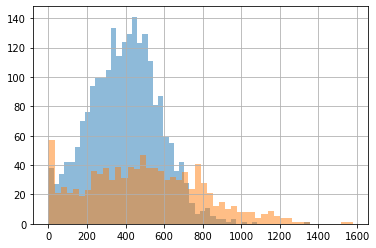

mess_quant


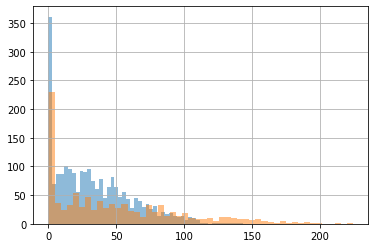

mb_used


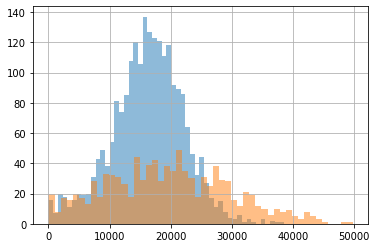

In [59]:
import matplotlib.pyplot as plt
main_ind = ['duration', 'mess_quant', 'mb_used']
for name in data_ultra[main_ind]:
    print(name)
    data_smart[name].hist(bins=50, alpha = 0.5)
    data_ultra[name].hist(bins=50, alpha = 0.5)
    plt.show()

Выделим блок пользователей, использующих тариф "смарт". Построим гистограммы минут разговора, сообщений и использованных Мб на основе помесячных данных.
Гистограммы, описывающие количество использованных минут и мегабайт, в целом напоминают нормальное распределение. Гистограмма использования сообщений напоминает сдвинутое нормальное распределение (или логнормальное). Большое количество нулевых значений в гистограмме обусловлено, тем, что значительная часть пользователей тарифа "смарт" вообще не использует смс.Выделим блок пользователей, использующих тариф "ультра". Построим гистограммы минут разговора, сообщений и использованных Мб на основе помесячных данных.
Гистограммы, описывающие количество использованных минут и мегабайт, также в целом напоминают нормальное распределение, но в меньшей степени, чем соответствующие гистограммы тарифа "смарт", что говорит о меньшей однородности пользователей тарифа "ультра" по сравнению с пользователями тарифа "смарт". Т.е. различные пользователи тарифа "ультра" используют этот тариф в совершенно разных целях, тогда как пользователи тарифа "смарт" стараются выжать из своего тарифа максимум пользы. Также следует отметить, что разброс внутри тарифа "ультра" выше, чем у тарифа "смарт".
Большое количество нулевых значений в гистограммах минут разговора и сообщений свидетельствует о том, что значительная часть пользователей использует свои сим-карты не в телефонах, а в планшетах (для интернета).
Гистограмма использования сообщений, как и в случае с тарифом "смарт", напоминает сдвинутое нормальное распределение (или логнормальное). 


## 6. Проверка гипотез

Проверим различается ли средняя выручка пользователей тарифов «ультра» и «смарт». Для этого нужно понять, как распределены выручки в тарифах.

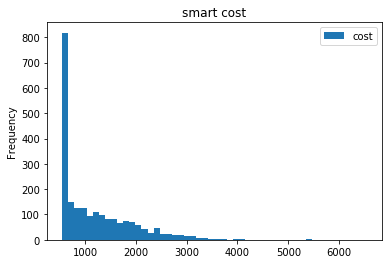

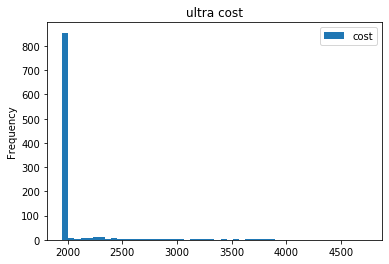

In [60]:
data_smart.plot(y='cost', kind = 'hist', title = 'smart cost', bins=50)
data_ultra.plot(y='cost', kind = 'hist', title = 'ultra cost', bins=50)
plt.show()

Гистограммы получились мелкими и непоказательными. Огромные столбцы со сзначениями, соответствующими базовым стоимостям тарифов свидетельствуют о том, что значительная часть пользователей старается не перерасходовать нормативы по минутам разговора, сообщениям и мегабайтам, заложенным в тарифы. Посмотрим как будет выглядеть распределение без указанных значений.

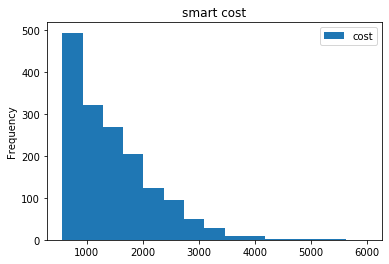

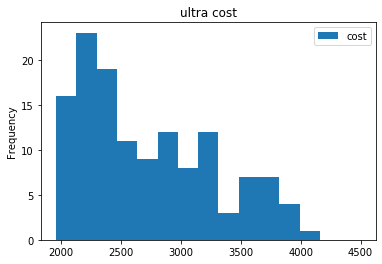

In [61]:
data_smart.plot(y='cost', kind = 'hist', title = 'smart cost', bins=15, range = (560, 6000))
plt.show()
data_ultra.plot(y='cost', kind = 'hist', title = 'ultra cost', bins=15, range = (1960, 4500))
plt.show()

В результате построения графиков мы получили распределения, напоминающие усеченное нормальное (хотя по тарифу "ультра" скорее получилось несколько пересекающихся нормальных распределений). Основываясь на этом делаем вывод о возможности применения t-критерия Стьюдента для проверки гипотезы о равенстве средних двух совокупностей.

Проверим различается ли средняя выручка оператора от пользователей тарифов «ультра» и «смарт». Чтобы проверить гипотезу о равенстве средних двух генеральных совокупностей применим метод scipy.stats.ttest_ind (array1, array2, equal_var). Параметр equal_var принимаем за True, т.к. данные взяты из схожих по параметрам совокупностей.

##### Нулевая гипотеза: средние выручки по тарифам «ультра» и «смарт» равны. Альтернативная гипотеза: средняя выручка по тарифу «ультра» не равна средней выручке тарифа «смарт». 

In [62]:
from scipy import stats as st
import numpy as np
alpha = 0.05 # задаем критический уровень статистической значимости
results = st.ttest_ind(data_smart['cost'], data_ultra['cost'])
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу. Средние выручки тарифов не равны.")
else:
    print("Не отвергаем нулевую гипотезу. Средние выручки тарифов могут быть равны.")

p-значение: 4.198314684235501e-213
Отвергаем нулевую гипотезу. Средние выручки тарифов не равны.


In [63]:
mean_cost = data_users.pivot_table(index='tariff_name', values='cost', aggfunc='mean', margins=True)
mean_cost

,cost
tariff_name,
smart,1198.113356
ultra,2059.879614
All,1462.220314


Проверка показала, что нулевая гипотеза была отвергнута при уровне значимости 5%. Средние выручки по тарифам не равны. Об этом же свидетельствует расчет среднемесячной выручки по каждому из тарифов. Выручка по тарифу "ультра" почти в 2 раза больше выручки по тарифу "смарт". 

Проверим различается ли средняя выручка пользователей из Москвы от аналогичного показателя по другим регионам

In [64]:
data_moscow = data_users.query('city == "Москва"')
data_moscow.sample(10)

,user_id,month,call_quant,duration,mess_quant,mb_used,tariff_name,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_above_tar,messages_above_tar,mb_above_tar,gb_above_tar,cost
1442,1102,8,56.0,391.58,28.0,19210.46,smart,Москва,50,15360,500.0,550,200,3,3,0.0,0.0,3851.0,3.760742,1302.15
1503,1115,7,7.0,67.35,3.0,372.56,smart,Москва,50,15360,500.0,550,200,3,3,0.0,0.0,0.0,0.000000,550.00
1309,1067,7,41.0,361.83,63.0,5774.90,smart,Москва,50,15360,500.0,550,200,3,3,0.0,13.0,0.0,0.000000,589.00
67,1049,3,47.0,380.10,0.0,6195.54,ultra,Москва,1000,30720,3000.0,1950,150,1,1,0.0,0.0,0.0,0.000000,1950.00
2749,1401,6,53.0,436.40,32.0,9673.25,smart,Москва,50,15360,500.0,550,200,3,3,0.0,0.0,0.0,0.000000,550.00
293,1180,5,8.0,82.62,22.0,36628.83,ultra,Москва,1000,30720,3000.0,1950,150,1,1,0.0,0.0,5909.0,5.770508,2815.58
331,1201,8,88.0,805.14,0.0,9248.09,ultra,Москва,1000,30720,3000.0,1950,150,1,1,0.0,0.0,0.0,0.000000,1950.00
2130,1248,5,13.0,98.63,0.0,2451.90,smart,Москва,50,15360,500.0,550,200,3,3,0.0,0.0,0.0,0.000000,550.00
2522,1338,10,20.0,175.07,34.0,17166.42,smart,Москва,50,15360,500.0,550,200,3,3,0.0,0.0,1807.0,1.764648,902.93
2395,1308,8,36.0,317.55,23.0,13138.54,smart,Москва,50,15360,500.0,550,200,3,3,0.0,0.0,0.0,0.000000,550.00


In [65]:
data_others = data_users.query('city != "Москва"')
data_others.sample(10)

,user_id,month,call_quant,duration,mess_quant,mb_used,tariff_name,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,minutes_above_tar,messages_above_tar,mb_above_tar,gb_above_tar,cost
1461,1109,3,51.0,403.74,1.0,14502.70,smart,Санкт-Петербург,50,15360,500.0,550,200,3,3,0.0,0.0,0.0,0.000000,550.00
1101,1025,10,74.0,615.81,43.0,14435.61,smart,Уфа,50,15360,500.0,550,200,3,3,116.0,0.0,0.0,0.000000,898.00
1509,1116,4,16.0,162.05,0.0,9607.82,smart,Петрозаводск,50,15360,500.0,550,200,3,3,0.0,0.0,0.0,0.000000,550.00
1062,1014,5,13.0,96.35,34.0,13049.11,smart,Чебоксары,50,15360,500.0,550,200,3,3,0.0,0.0,0.0,0.000000,550.00
2907,1431,11,30.0,261.37,79.0,18205.88,smart,Уфа,50,15360,500.0,550,200,3,3,0.0,29.0,2846.0,2.779297,1192.86
947,1091,5,0.0,0.00,30.0,10703.37,ultra,Набережные Челны,1000,30720,3000.0,1950,150,1,1,0.0,0.0,0.0,0.000000,1950.00
501,1294,12,30.0,245.88,23.0,27306.37,ultra,Владивосток,1000,30720,3000.0,1950,150,1,1,0.0,0.0,0.0,0.000000,1950.00
1398,1088,7,37.0,305.72,38.0,14234.33,smart,Казань,50,15360,500.0,550,200,3,3,0.0,0.0,0.0,0.000000,550.00
2837,1421,7,40.0,338.92,63.0,21237.29,smart,Калининград,50,15360,500.0,550,200,3,3,0.0,13.0,5878.0,5.740234,1737.05
2724,1394,11,56.0,481.87,5.0,6927.97,smart,Орёл,50,15360,500.0,550,200,3,3,0.0,0.0,0.0,0.000000,550.00


Выделяем совокупности данных о тарифах по Москве и остальным регионам. Проверяем.

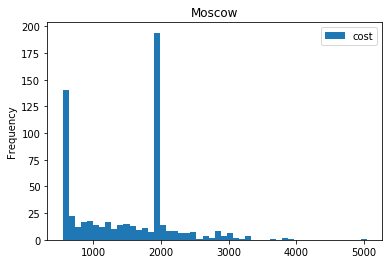

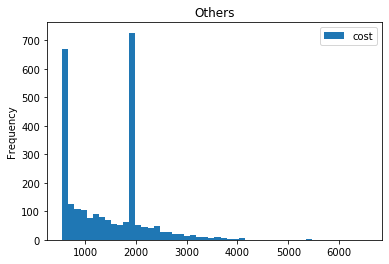

In [66]:
data_moscow.plot(y='cost', kind = 'hist', title = 'Moscow', bins=50)
plt.show()
data_others.plot(y='cost', kind = 'hist', title = 'Others', bins=50)
plt.show()

Рассмотрим распределение средней выручки пользователей Москвы и остальных регионов. По графикам сложно сделать вывод, т.к. мешают частоты, соответствующие базовым стоимостям тарифов.

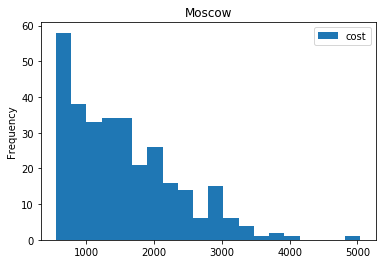

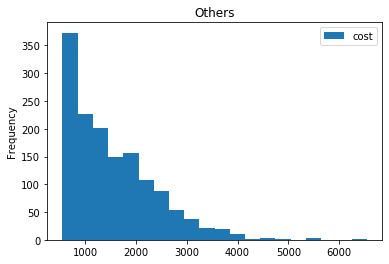

In [67]:
data_m = data_moscow.query('cost not in (550, 1950)')
data_o = data_others.query('cost not in (550, 1950)')
data_m.plot(y='cost', kind = 'hist', title = 'Moscow', bins=20)
plt.show()
data_o.plot(y='cost', kind = 'hist', title = 'Others', bins=20)
plt.show()

Убираем данные с базовыми стоимостями тарифов и заново строим графики. 
На обоих гистограммах наблюдается усеченное нормальное распределение. Можно применять t-критерий Стьюдента.

Проверим различается ли средняя выручка оператора от пользователей Москвы и других регионов. Чтобы проверить гипотезу о равенстве средних двух генеральных совокупностей применим метод scipy.stats.ttest_ind (array1, array2, equal_var). Параметр equal_var принимаем за True, т.к. данные взяты из схожих по параметрам совокупностей. 

##### Нулевая гипотеза: средняя выручка по пользователям Москвы равна средней выручке по пользователям других регионов. Альтернативная гипотеза: средние выручки по сотового оператора по Москве и другим регионам не равны. 

In [68]:
from scipy import stats as st
import numpy as np
alpha = 0.05 # задаем критический уровень статистической значимости
results = st.ttest_ind(data_moscow['cost'], data_others['cost'])
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу. Средние выручки тарифов не равны.")
else:
    print("Не отвергаем нулевую гипотезу. Средние выручки тарифов могут быть равны.")

p-значение: 0.41314302417849347
Не отвергаем нулевую гипотезу. Средние выручки тарифов могут быть равны.


Проверка показала, что нулевая гипотеза не была отвергнута при уровне значимости 5%. Средние выручки в Москве и регионах могут быть равны, что свидетельствует об идентичном потребительском поведении жителей Москвы и регионов в отношении сотовой связи.

Я изначально альтернативную гипотезу выдвинул о том, что средняя выручка по Москве будет выше средней выручки по регионам, потом понял, что это не правильно, гипотезу исправил,а деление убрать забыл. Исправлено. 
Нулевая и альтернативные гипотезы в тексте были, выделил их отдельно.

7. Выводы

На основании проведенного исследования можно сделать вывод о том, что для оператора более выгоден тариф "ультра" и именно в рекламу данного тарифа надо вкладывать средства, т.к. в среднем пользователи этого тарифа не выбирают и четверти от нормативов по минутам разговора и сообщениям, заложенным в него. Т.е. себестоимость услуг, заложенных в тариф оказывается ниже планировавшейся при формировании указанного тарифа. Относительно тарифа "смарт" можно сказать, что его пользователи стараются по максимуму использовать опции, заложенные в тариф, что снижает прибыльность тарифа для оператора.
Потребительское поведение пользователей тарифа "ультра" свидетельствует о том, что в основном это молодежь: не могут адекватно оценить свои потребности, либо используют этот тариф исключительно для интернета. Это также говорит о необходимости перераспределения рекламного бюджета в пользу тарифа "ультра", т.к. молодежь больше подвержена рекламе, чем старшее поколение.
Еще одним доводом в пользу тарифа "ультра" является его более высокая выручка на одного пользователя по сравнению с тарифом "смарт", о чем свидетельствует отклонение гипотезы о равенстве тарифов.
Проверка гипотезы о равенстве средней выручки оператора по пользователям Москвы и остальных регионов, которая не была отвергнута, позволяет сделать вывод о том, что реклама тарифа "ультра" должна быть ориентирована на всю страну, а не только на столицу.